<a href="https://colab.research.google.com/github/khizerzakir/ERASMUS-CDE/blob/main/data_mining_knowledge_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


##Empirical expectation and variance

###Example 1

In [ ]:
#Notation in a class
X=np.array([4,8,9,9,10,10,10,11,12,12,14,15,18])
print(X)

[ 4  8  9  9 10 10 10 11 12 12 14 15 18]


In [ ]:
# number of notes
N=np.size(X)
# Empirical expectation
m = sum(X)/N
print('Empirical expectation : ',m)
print('Numpy expectation : ',np.mean(X))

Empirical expectation :  10.923076923076923
Numpy expectation :  10.923076923076923


In [ ]:
# Biased variance
v1= np.sum((X-m)*(X-m))/N

# Unbiased variance
v2= np.sum((X-m)*(X-m))/(N-1)

print('Biased variance : ',v1)
print('Unbiased variance : ',v2)
print('Numpy biased variance : ',np.var(X))
print('numpy unbiased variance : ',np.var(X,ddof=1))


Biased variance :  11.14792899408284
Unbiased variance :  12.076923076923075
Numpy biased variance :  11.14792899408284
numpy unbiased variance :  12.076923076923075


###Example 2

In [ ]:
# Data matrix
X=np.array([[-2,300,-1],[-1,100,0],[2,-100,-1],[1,-300,2]])
dim,N=X.shape
print("data matrix :\n ",X)
print("dimension : ",dim, "nb realizations",N)



data matrix :
  [[  -2  300   -1]
 [  -1  100    0]
 [   2 -100   -1]
 [   1 -300    2]]
dimension :  4 nb realizations 3


In [ ]:
# Empirical expectation
mX=np.sum(X,axis=0)/dim
print('empirical expectation : ',mX)
mX=np.sum(X,axis=0)/dim
print('Numpy expectation : ',np.mean(X,axis=0))
# Empirical variance
variance=np.zeros((1,N))
for i in range(dim):
  diff = X[i,:]-mX
  variance += diff*diff
biased_variance = variance/dim
biased_std = np.sqrt(biased_variance)
unbiased_variance = variance/(dim-1)
unbiased_std = np.sqrt(unbiased_variance)

#mX=np.mean(X,axis=0)
print('biased variance : ',biased_variance, "\nbiased std",biased_std)
print('unbiased variance : ',unbiased_variance, "\nunbiased std",unbiased_std)
print('* numpy biased variance : ',np.var(X,axis=0), "\n* numpy unbiased std",np.std(X,axis=0))
print('* numpy unbiased variance : ',np.var(X,ddof=1,axis=0), "\n* numpy unbiased std",np.std(X,ddof=1,axis=0))


empirical expectation :  [0. 0. 0.]
Numpy expectation :  [0. 0. 0.]
biased variance :  [[2.5e+00 5.0e+04 1.5e+00]] 
biased std [[  1.58113883 223.60679775   1.22474487]]
unbiased variance :  [[3.33333333e+00 6.66666667e+04 2.00000000e+00]] 
unbiased std [[  1.82574186 258.19888975   1.41421356]]
* numpy biased variance :  [2.5e+00 5.0e+04 1.5e+00] 
* numpy unbiased std [  1.58113883 223.60679775   1.22474487]
* numpy unbiased variance :  [3.33333333e+00 6.66666667e+04 2.00000000e+00] 
* numpy unbiased std [  1.82574186 258.19888975   1.41421356]


In [ ]:
# Centered version :
Xc=np.zeros((dim,N))
for i in range(dim):
  Xc[i,:] = (X[i,:]-mX)

# Centered reduced ersion :
Xcr=np.zeros((dim,N))
for i in range(dim):
  Xcr[i,:] = (X[i,:]-mX)/unbiased_std
print("Centered matrix : \n",Xc)
print("Centered / reduced matrix : \n",Xcr)
print("Check the standard deviation : ", np.std(Xcr,axis=0,ddof=1))

Centered matrix : 
 [[  -2.  300.   -1.]
 [  -1.  100.    0.]
 [   2. -100.   -1.]
 [   1. -300.    2.]]
Centered / reduced matrix : 
 [[-1.09544512  1.161895   -0.70710678]
 [-0.54772256  0.38729833  0.        ]
 [ 1.09544512 -0.38729833 -0.70710678]
 [ 0.54772256 -1.161895    1.41421356]]
Check the standard deviation :  [1. 1. 1.]


In [ ]:
# Correlation matrix
Xcorr=np.zeros((3,3))
for i in range(N):
  for j in range(N):
    Xcorr[i,j]=np.dot(Xcr[:,i],np.transpose(Xcr[:,j]))/(dim-1)

print("Correlation matrix : ")
print(Xcorr)


Correlation matrix : 
[[ 1.         -0.84852814  0.25819889]
 [-0.84852814  1.         -0.73029674]
 [ 0.25819889 -0.73029674  1.        ]]


###Eigen values/vector

In [ ]:
# Initial matrix
M=np.array([[1,2],[3,2]])
print('Matrix\n',M)
#Eigen vector
Q=np.array([[1,2],[-1,3]])
print('Eigen vectors\n',Q)
#Eigen value matrix
L=np.array([[-1,0],[0,4]])
print('Eigen values\n',L)
# Recontreuction

Mr = np.matmul(Q,np.matmul(L,np.linalg.inv(Q)))
print('Reconstruction\n',Mr)


Matrix
 [[1 2]
 [3 2]]
Eigen vectors
 [[ 1  2]
 [-1  3]]
Eigen values
 [[-1  0]
 [ 0  4]]
Reconstruction
 [[1. 2.]
 [3. 2.]]


In [ ]:
# Initial matrix
M=np.array([[0,-2],[-4,2]])
print('Matrix\n',M)
#Eigen vector
Q=np.array([[1,1],[-2,1]])
print('Eigen vectors\n',Q)
#Eigen value matrix
L=np.array([[4,0],[0,-2]])
print('Eigen values\n',L)
# Recontreuction

Mr = np.matmul(Q,np.matmul(L,np.linalg.inv(Q)))
print('Reconstruction\n',Mr)


Matrix
 [[ 0 -2]
 [-4  2]]
Eigen vectors
 [[ 1  1]
 [-2  1]]
Eigen values
 [[ 4  0]
 [ 0 -2]]
Reconstruction
 [[ 0. -2.]
 [-4.  2.]]


#PCA

###Illustration

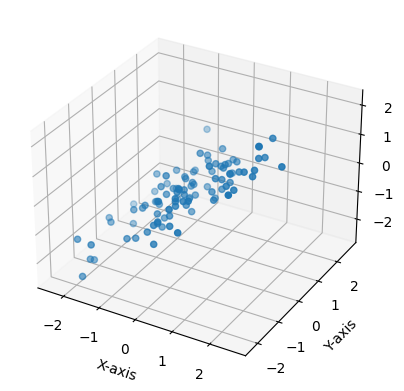

[[-1.87943674 -0.62726888 -1.50296454]
 [-1.75500456 -2.09784608 -2.38011934]
 [-0.91570497  0.04009738 -0.95124138]
 [-0.69837287 -0.22323674 -0.08112143]
 [-0.82113455 -0.22049507 -0.64422165]
 [-0.11426629 -1.5182402  -0.35435928]
 [ 0.15699044  0.86643273 -0.87286135]
 [-0.37729989 -0.91933267 -0.79073257]
 [-2.37165377  1.1742661  -2.22034888]
 [ 0.03125595 -1.53148997  0.52040508]]


In [ ]:

# Set the random seed for reproducible results
np.random.seed(0)

# Define means and covariances to generate correlated data
mean = [0, 0, 0]  # Mean for each dimension
cov = [
    [1.0, 0.01, 0.9],  # Covariance between dimension 1 and itself
    [0.01, 1.0, 0.1],  # Covariance between dimension 2 and itself
    [0.9, 0.1, 1.0]   # Covariance between dimension 3 and itself
]

# Generate correlated 3D data
X = np.random.multivariate_normal(mean, cov, 100)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

# Show some data
print(X[0:10,:])

2)Computation of variance-covariance and correlation matrices

In [ ]:
mean_vector = np.mean(X, axis=0)  # mean along each dimension
n = X.shape[0]  # Nb observations
cov_matrix = np.zeros((X.shape[1], X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        cov_matrix[i, j] = np.sum((X[:, i] - mean_vector[i]) * (X[:, j] - mean_vector[j])) / (n - 1)

# Variance for each dimension
variances = np.diag(cov_matrix)

# Correlation matrix
correlation_matrix = np.zeros((X.shape[1], X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        correlation_matrix[i, j] = cov_matrix[i, j] / (np.sqrt(variances[i]) * np.sqrt(variances[j]))


print("Var/covar matrix : ")
print(cov_matrix)

print("Correlation matrix : ")
print(correlation_matrix)


Var/covar matrix : 
[[ 1.12224829 -0.05134902  0.97018669]
 [-0.05134902  0.95721959  0.03892642]
 [ 0.97018669  0.03892642  1.01193873]]
Correlation matrix : 
[[ 1.         -0.04954296  0.9104031 ]
 [-0.04954296  1.          0.03955137]
 [ 0.9104031   0.03955137  1.        ]]


3) Perform PCA and compute new coordinates


Basis of the principal component :
[[ 0.72708214 -0.04311081 -0.6851956 ]
 [-0.00981088  0.99727221 -0.07315652]
 [ 0.68648037  0.05991317  0.72467586]]
Information embed in each axes :
[2.03895063 0.96177793 0.09067806]
Coordinates in the new system :
[[-2.39210649e+00 -6.34581166e-01]
 [-2.88935597e+00 -2.15906444e+00]
 [-1.31919466e+00  2.24728899e-02]
 [-5.61272561e-01 -1.97380624e-01]
 [-1.03711453e+00 -2.23091194e-01]
 [-3.11446396e-01 -1.53040344e+00]
 [-4.93557709e-01  8.05005410e-01]
 [-8.08130933e-01 -9.47934524e-01]
 [-3.26013362e+00  1.14027871e+00]
 [ 3.94998786e-01 -1.49748074e+00]
 [-1.69238328e-01 -3.97480473e-01]
 [ 2.68622134e+00  6.12684165e-01]
 [-1.57022809e+00 -1.36127142e+00]
 [ 3.24212493e-01  1.08203390e+00]
 [ 2.53787741e+00 -1.70999740e+00]
 [ 4.73946947e-01  1.30502362e+00]
 [ 2.20341570e+00  4.28109060e-01]
 [-5.72154774e-01  4.54825049e-01]
 [ 7.98857621e-02 -4.21976664e-01]
 [-4.74477419e-01  5.89605150e-01]
 [ 8.95119843e-01  4.47369534e-01]
 [ 2.3919790

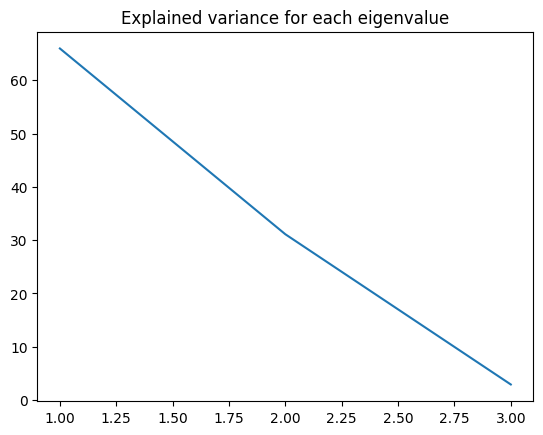

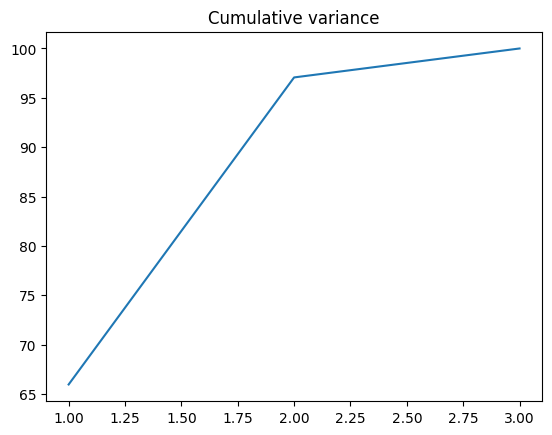

In [ ]:
# Computation of eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvector in decreasing order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Basis of the principal component :")
print(eigenvectors)
print("Information embed in each axes :")
print(eigenvalues)

# Computation of the ratio of variance explained by each eigenvalue
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance * 100
plt.plot(np.arange(1,explained_variance_ratio.shape[0]+1),explained_variance_ratio)
plt.title('Explained variance for each eigenvalue')

# Computation of the cumulative variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure()
plt.plot(np.arange(1,cumulative_explained_variance.shape[0]+1),cumulative_explained_variance)
plt.title('Cumulative variance')





# Computation of principal component by projecting data along eigenvectors and keep 95% of the information
principal_components = np.dot(X, eigenvectors)

threshold = 95
index = np.argmax(cumulative_explained_variance > threshold)
new_coordinates = principal_components[:,0:index+1]
print("Coordinates in the new system :")
print(new_coordinates)

Visualization

#Data 1 : Fully correlated data

---



---



1) Define data and plot them

In [ ]:
X=np.array([[2,3],[5,9],[4,7],[3,5],[11,21]])
print('Data matrix X:\n',X)

Data matrix X:
 [[ 2  3]
 [ 5  9]
 [ 4  7]
 [ 3  5]
 [11 21]]


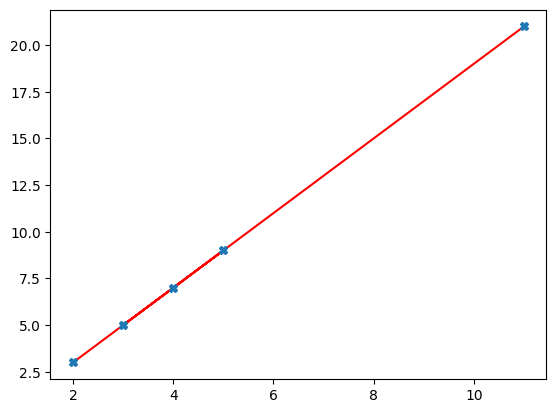

In [ ]:
plt.plot(X[:,0],X[:,1],'r')
plt.plot(X[:,0],X[:,1],'X')


Question : how are data ?

2)Computation of variance-covariance and correlation matrices

In [ ]:
mean_vector = np.mean(X, axis=0)  # mean along each dimension
n = X.shape[0]  # Nb observations
cov_matrix = np.zeros((X.shape[1], X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        cov_matrix[i, j] = np.sum((X[:, i] - mean_vector[i]) * (X[:, j] - mean_vector[j])) / (n - 1)

# Variance for each dimension
variances = np.diag(cov_matrix)

# Correlation matrix
correlation_matrix = np.zeros((X.shape[1], X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        correlation_matrix[i, j] = cov_matrix[i, j] / (np.sqrt(variances[i]) * np.sqrt(variances[j]))


print("Var/covar matrix : ")
print(cov_matrix)

print("Correlation matrix : ")
print(correlation_matrix)


Var/covar matrix : 
[[12.5 25. ]
 [25.  50. ]]
Correlation matrix : 
[[1. 1.]
 [1. 1.]]


Question : What can we conclude about the correlation matrix ?

3) Perform PCA and compute new coordinates

Basis of the principal component :
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Information embed in each axes :
[62.5  0. ]
Coordinates in the new system :
[[ -3.57770876]
 [-10.2859127 ]
 [ -8.04984472]
 [ -5.81377674]
 [-23.70232056]]


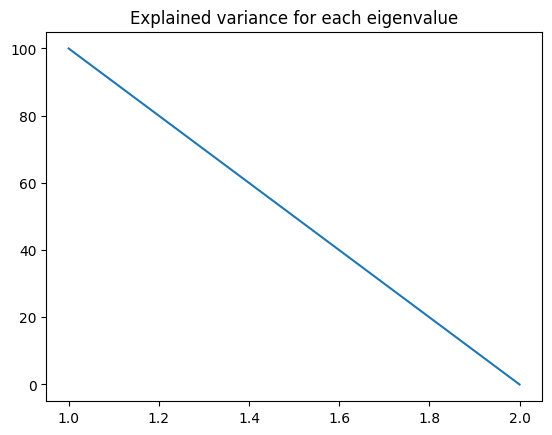

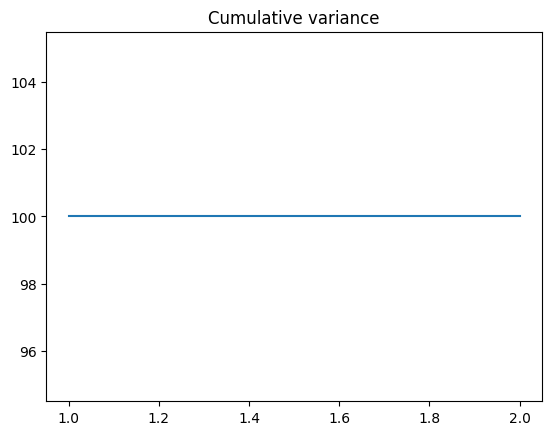

In [ ]:
# Computation of eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvector in decreasing order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Basis of the principal component :")
print(eigenvectors)
print("Information embed in each axes :")
print(eigenvalues)

# Computation of the ratio of variance explained by each eigenvalue
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance * 100
plt.plot(np.arange(1,explained_variance_ratio.shape[0]+1),explained_variance_ratio)
plt.title('Explained variance for each eigenvalue')

# Computation of the cumulative variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure()
plt.plot(np.arange(1,cumulative_explained_variance.shape[0]+1),cumulative_explained_variance)
plt.title('Cumulative variance')





# Computation of principal component by projecting data along eigenvectors
principal_components = np.dot(X, eigenvectors)

threshold = 95
index = np.argmax(cumulative_explained_variance > threshold)
new_coordinates = principal_components[:,0:index+1]
print("Coordinates in the new system :")
print(new_coordinates)

Question : How many components should we keep ?

#Data 2 :  correlated data

---



1) Create data and vizualise them

Data matrix X:
 [[ 1.   1. ]
 [ 1.5  3.5]
 [ 2.   5. ]
 [ 4.5 10. ]
 [ 3.   5.5]
 [ 3.5  8. ]
 [ 4.   7. ]
 [ 5.  11. ]]


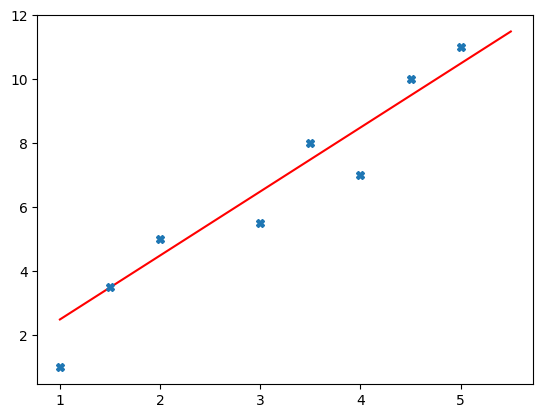

In [ ]:
X=np.array([[1,1],[1.5,3.5],[2,5],[4.5,10],[3,5.5],[3.5,8],[4,7],[5,11]])
print('Data matrix X:\n',X)
plt.plot(np.arange(1,6,0.5),2*np.arange(1,6,0.5)+0.5,'r')
plt.plot(X[:,0],X[:,1],'X')


Question : how are organized data ?

2) Computation of variance-covariance and correlation matrices

In [ ]:
mean_vector = np.mean(X, axis=0)  # mean along each dimension
n = X.shape[0]  # Nb observations
cov_matrix = np.zeros((X.shape[1], X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        cov_matrix[i, j] = np.sum((X[:, i] - mean_vector[i]) * (X[:, j] - mean_vector[j])) / (n - 1)

# Variance for each dimension
variances = np.diag(cov_matrix)

# Correlation matrix
correlation_matrix = np.zeros((X.shape[1], X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        correlation_matrix[i, j] = cov_matrix[i, j] / (np.sqrt(variances[i]) * np.sqrt(variances[j]))


print("Var/covar matrix : ")
print(cov_matrix)

print("Correlation matrix : ")
print(correlation_matrix)


Var/covar matrix : 
[[ 2.10267857  4.65178571]
 [ 4.65178571 11.05357143]]
Correlation matrix : 
[[1.        0.9648992]
 [0.9648992 1.       ]]


Question : What can we conclude about the correlation matrix ?

3) Perform PCA and compute new coordinates

Basis of the principal component :
[[-0.39158907 -0.92014021]
 [-0.92014021  0.39158907]]
Information embed in each axes :
[13.03325715  0.12299285]
Coordinates in the new system :
[[ -1.31172928]
 [ -3.80787433]
 [ -5.38387917]
 [-10.96355288]
 [ -6.23553835]
 [ -8.7316834 ]
 [ -8.00733773]
 [-12.07948762]]


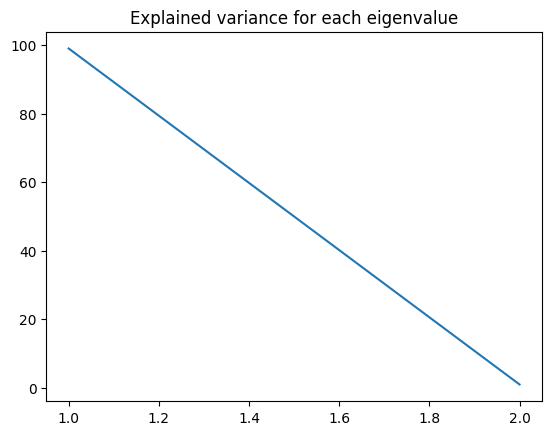

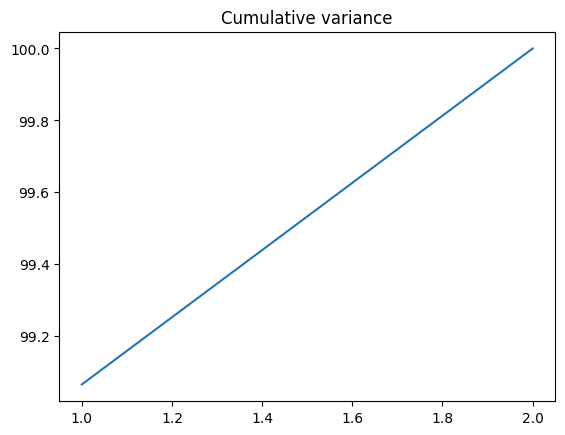

In [ ]:
# Computation of eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvector in decreasing order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Basis of the principal component :")
print(eigenvectors)
print("Information embed in each axes :")
print(eigenvalues)
# Computation of the ratio of variance explained by each eigenvalue
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance * 100
plt.plot(np.arange(1,explained_variance_ratio.shape[0]+1),explained_variance_ratio)
plt.title('Explained variance for each eigenvalue')

# Computation of the cumulative variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure()
plt.plot(np.arange(1,cumulative_explained_variance.shape[0]+1),cumulative_explained_variance)
plt.title('Cumulative variance')


# Computation of principal component by projecting data along eigenvectors
principal_components = np.dot(X, eigenvectors)

threshold = 95
index = np.argmax(cumulative_explained_variance > threshold)
new_coordinates = principal_components[:,0:index+1]
print("Coordinates in the new system :")
print(new_coordinates)

Question : How many components should we keep ?

#Data 3 :  notations of students


---



In [ ]:
X=np.zeros((9,5))
X[0,:]=np.array([6,6,5,5.5,8])
X[1,:]=np.array([8,8,8,8,9])
X[2,:]=np.array([6,7,11,9.5,11])
X[3,:]=np.array([14.5,14.5,15.5,15,8])
X[4,:]=np.array([14,14,12,12,10])
X[5,:]=np.array([11,10,5.5,7,13])
X[6,:]=np.array([5.5,7,14,11.5,10])
X[7,:]=np.array([13,12.5,8.5,9.5,12])
X[8,:]=np.array([9,9.5,12.5,12,18])
print("notations : \n",X)
school_subject=["Maths", "Physics", "French", "Language", "Music"]

notations : 
 [[ 6.   6.   5.   5.5  8. ]
 [ 8.   8.   8.   8.   9. ]
 [ 6.   7.  11.   9.5 11. ]
 [14.5 14.5 15.5 15.   8. ]
 [14.  14.  12.  12.  10. ]
 [11.  10.   5.5  7.  13. ]
 [ 5.5  7.  14.  11.5 10. ]
 [13.  12.5  8.5  9.5 12. ]
 [ 9.   9.5 12.5 12.  18. ]]


2) Computation of variance-covariance and correlation matrices

In [ ]:
mean_vector = np.mean(X, axis=0)  # mean along each dimension
n = X.shape[0]  # Nb observations
cov_matrix = np.zeros((X.shape[1], X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        cov_matrix[i, j] = np.sum((X[:, i] - mean_vector[i]) * (X[:, j] - mean_vector[j])) / (n - 1)

# Variance for each dimension
variances = np.diag(cov_matrix)

# Correlation matrix
correlation_matrix = np.zeros((X.shape[1], X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        correlation_matrix[i, j] = cov_matrix[i, j] / (np.sqrt(variances[i]) * np.sqrt(variances[j]))


print("Var/covar matrix : ")
print(cov_matrix)

print("Correlation matrix : ")
print(correlation_matrix)


Var/covar matrix : 
[[12.8125     11.15625     2.98958333  5.15625     0.125     ]
 [11.15625    10.0625      4.63541667  5.90625     0.0625    ]
 [ 2.98958333  4.63541667 13.56944444 10.34375     0.4375    ]
 [ 5.15625     5.90625    10.34375     8.625       0.8125    ]
 [ 0.125       0.0625      0.4375      0.8125      9.75      ]]
Correlation matrix : 
[[1.         0.98253573 0.22673193 0.49049826 0.01118384]
 [0.98253573 1.         0.39669324 0.6339855  0.00630993]
 [0.22673193 0.39669324 1.         0.95613107 0.03803599]
 [0.49049826 0.6339855  0.95613107 1.         0.08860159]
 [0.01118384 0.00630993 0.03803599 0.08860159 1.        ]]


Question : what can we interpret from this correlation matrix ?

3) Perform PCA and compute new coordinates

Basis of the principal component :
[[-0.51741848 -0.56542263  0.05243069 -0.28815353  0.57165893]
 [-0.50963933 -0.37170787  0.01441681  0.53778204 -0.55918123]
 [-0.49553929  0.64688517 -0.1143956   0.40011783  0.40348452]
 [-0.47533516  0.33169625 -0.02065781 -0.68272647 -0.4444006 ]
 [-0.032298    0.11682331  0.99173085  0.03934845  0.01519127]]
Information embed in each axes :
[3.14088668e+01 1.36756369e+01 9.69012724e+00 4.00494957e-02
 4.76396071e-03]
Coordinates in the new system :
[[-11.51277071   0.37055867   7.6493358 ]
 [-16.27414011   1.38301711   8.37993031]
 [-16.99388044   5.55741673   9.86994029]
 [-29.96160873   2.34835805   6.82013648]
 [-26.3522828   -0.20861692   9.23253248]
 [-17.26068281  -2.53828246  12.83962622]
 [-19.14016141   8.32735274   8.46749165]
 [-22.21227589  -1.94532458  11.59396743]
 [-21.97796704   5.5492107   16.78215239]]


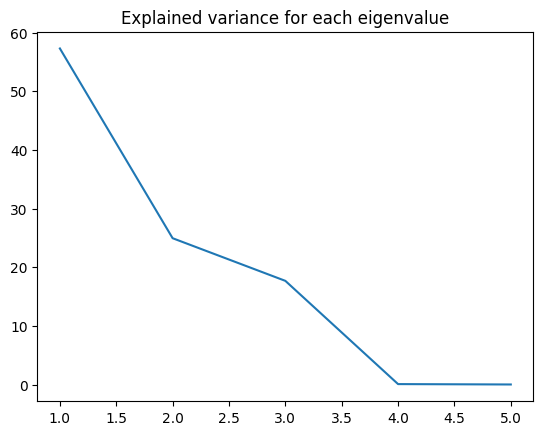

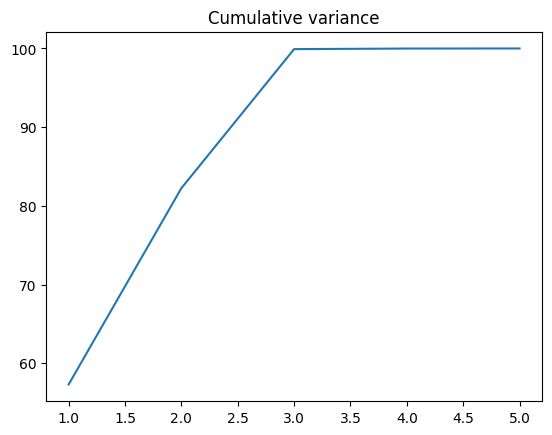

In [ ]:
# Computation of eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvector in decreasing order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Basis of the principal component :")
print(eigenvectors)
print("Information embed in each axes :")
print(eigenvalues)


# Computation of the ratio of variance explained by each eigenvalue
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance * 100
plt.plot(np.arange(1,explained_variance_ratio.shape[0]+1),explained_variance_ratio)
plt.title('Explained variance for each eigenvalue')

# Computation of the cumulative variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure()
plt.plot(np.arange(1,cumulative_explained_variance.shape[0]+1),cumulative_explained_variance)
plt.title('Cumulative variance')


# Computation of principal component by projecting data along eigenvectors
principal_components = np.dot(X, eigenvectors)

threshold = 95
index = np.argmax(cumulative_explained_variance > threshold)
new_coordinates = principal_components[:,0:index+1]
print("Coordinates in the new system :")
print(new_coordinates)

Question : how can you interpret the basis and the coordinates ? how many components should be keep ?

Spectral clustering

In [ ]:
D=np.zeros((6,6))
D[0,:]=[2,0,0,0,0,0]
D[1,:]=[0,1.7,0,0,0,0]
D[2,:]=[0,0,1.7,0,0,0]
D[3,:]=[0,0,0,1.7,0,0]
D[4,:]=[0,0,0,0,1.8,0]
D[5,:]=[0,0,0,0,0,1.7]

W=np.zeros((6,6))
W[0,:]=[0,0.2,0,0,0.9,0.9]
W[1,:]=[0.2,0,0.8,0.7,0,0]
W[2,:]=[0,0.8,0,0.9,0,0]
W[3,:]=[0,0.7,0.9,0,0.1,0]
W[4,:]=[0.9,0,0,0.1,0,0.8]
W[5,:]=[0.9,0,0,0,0.8,0]
print('Matrix D\n',D)
print('Matrix W\n',W)
print('Matrix D-W\n',(D-W))

print('Sum of D-W along one axis\n',(D-W).sum(axis=0))


Matrix D
 [[2.  0.  0.  0.  0.  0. ]
 [0.  1.7 0.  0.  0.  0. ]
 [0.  0.  1.7 0.  0.  0. ]
 [0.  0.  0.  1.7 0.  0. ]
 [0.  0.  0.  0.  1.8 0. ]
 [0.  0.  0.  0.  0.  1.7]]
Matrix W
 [[0.  0.2 0.  0.  0.9 0.9]
 [0.2 0.  0.8 0.7 0.  0. ]
 [0.  0.8 0.  0.9 0.  0. ]
 [0.  0.7 0.9 0.  0.1 0. ]
 [0.9 0.  0.  0.1 0.  0.8]
 [0.9 0.  0.  0.  0.8 0. ]]
Matrix D-W
 [[ 2.  -0.2  0.   0.  -0.9 -0.9]
 [-0.2  1.7 -0.8 -0.7  0.   0. ]
 [ 0.  -0.8  1.7 -0.9  0.   0. ]
 [ 0.  -0.7 -0.9  1.7 -0.1  0. ]
 [-0.9  0.   0.  -0.1  1.8 -0.8]
 [-0.9  0.   0.   0.  -0.8  1.7]]
Sum of D-W along one axis
 [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16 -1.38777878e-16
  0.00000000e+00 -2.22044605e-16]


In [ ]:
#Clusters
q=np.array([1,-1,-1,-1,1,1])
cut_clusters = 0.25*np.matmul(q.T,np.matmul(D-W,q))
print('Cut between the 2 clusters : ',cut_clusters)

0.29999999999999993